In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from keras import *
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras import regularizers
from keras.optimizers import Adam, RMSprop
from keras.backend import clear_session

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train = pd.read_csv("/content/drive/MyDrive/AML project/train_manipulated_integrated.csv")

In [3]:
## preparazione train e validation set

y_train = train['trip_duration'].values.reshape(-1, 1)

X_train = train.drop(columns = ['trip_duration'])

#si separano le dummies dalle quantitative

X_train_to_stand = X_train[['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']]

X_train_not_stand = X_train.drop(columns = ['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']).values

In [4]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_to_stand)
y_train = scaler.fit(y_train).fit_transform(y_train)

In [5]:
X_train = np.concatenate((X_train, X_train_not_stand), axis = 1)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3,
                                                  random_state = 1234)

In [7]:
X_train.shape

(1008303, 48)

In [13]:
#modello no ottimizzato

initializer = tf.keras.initializers.GlorotUniform(seed=1000)


opt = tf.keras.optimizers.SGD(learning_rate= 0.002, momentum=0.3, 
                              nesterov = False)

model_no_opt = Sequential()
model_no_opt.add(Dense(256, input_shape = (48,),
                activation = "relu", 
                kernel_regularizer= regularizers.l1(0.0002),
                kernel_initializer=initializer))
model_no_opt.add(Dense(128,
                activation = "relu",kernel_regularizer= regularizers.l1(0.0002), 
                kernel_initializer=initializer))
model_no_opt.add(Dense(128,
                activation = "relu", 
                kernel_regularizer= regularizers.l1(0.0002),
                kernel_initializer=initializer))
model_no_opt.add(Dense(32,
                activation = "relu", 
                kernel_regularizer= regularizers.l1(0.0002),
                kernel_initializer=initializer))
model_no_opt.add(Dense(1,
                activation = "linear", 
                kernel_regularizer= regularizers.l1(0.0002),
                kernel_initializer=initializer))
model_no_opt.compile(loss = "mse", optimizer=opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])

model_no_opt.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               12544     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 66,113
Trainable params: 66,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

history_no_opt = model_no_opt.fit(X_train, y_train, epochs = 100, 
            batch_size = 128, validation_data=(X_val, y_val),
            shuffle = True,
            callbacks = es,
            verbose=2)

Epoch 1/100
7878/7878 - 29s - loss: 1.2340 - root_mean_squared_error: 0.5910 - val_loss: 1.1670 - val_root_mean_squared_error: 0.5571
Epoch 2/100
7878/7878 - 24s - loss: 1.1331 - root_mean_squared_error: 0.5512 - val_loss: 1.1001 - val_root_mean_squared_error: 0.5460
Epoch 3/100
7878/7878 - 24s - loss: 1.0697 - root_mean_squared_error: 0.5426 - val_loss: 1.0376 - val_root_mean_squared_error: 0.5372
Epoch 4/100
7878/7878 - 24s - loss: 1.0126 - root_mean_squared_error: 0.5377 - val_loss: 0.9836 - val_root_mean_squared_error: 0.5344
Epoch 5/100
7878/7878 - 24s - loss: 0.9590 - root_mean_squared_error: 0.5343 - val_loss: 0.9309 - val_root_mean_squared_error: 0.5306
Epoch 6/100
7878/7878 - 24s - loss: 0.9081 - root_mean_squared_error: 0.5314 - val_loss: 0.8920 - val_root_mean_squared_error: 0.5381
Epoch 7/100
7878/7878 - 24s - loss: 0.8595 - root_mean_squared_error: 0.5287 - val_loss: 0.8336 - val_root_mean_squared_error: 0.5251
Epoch 8/100
7878/7878 - 24s - loss: 0.8133 - root_mean_squared

In [ ]:
train_no_opt_mse = history_no_opt.history['loss']
val_no_opt_mse = history_no_opt.history['val_loss']

train_no_opt_rmse = history_no_opt.history['root_mean_squared_error']
val_no_opt_rmse = history_no_opt.history['val_root_mean_squared_error']

In [ ]:
train_no_opt_mse = history_no_opt.history['loss']
val_no_opt_mse = history_no_opt.history['val_loss']

train_no_opt_rmse = history_no_opt.history['root_mean_squared_error']
val_no_opt_rmse = history_no_opt.history['val_root_mean_squared_error']

In [ ]:
perf_no_opt_l2 = pd.DataFrame({'epochs': list(np.arange(0, 30)[0:30]), 
                               'loss':train_no_opt_mse,
                               'val_loss':val_no_opt_mse,
                               'rmse': train_no_opt_rmse,
                               'val_rmse': val_no_opt_rmse})

#backup per non riallenare
perf_no_opt_l2.to_csv("/content/drive/MyDrive/perf_no_opt_l2.csv", index = False)
model_no_opt.save("/content/drive/MyDrive/model_no_opt_l2.h5")

In [8]:
#modello ottimizzato

activations = "relu"
units_1 = 64
units_2 = 112
units_3 = 64
lambda_1 = 0.0004268971223779536

initializer = tf.keras.initializers.GlorotUniform()


opt = tf.keras.optimizers.SGD(learning_rate= 0.002, momentum=0.2, 
                              nesterov = False)

model = Sequential()
model.add(Dense(64, input_shape = (48,),
                activation = activations, 
                kernel_regularizer= regularizers.l1(lambda_1),
                kernel_initializer=initializer))
model.add(Dense(112,
                activation = activations, 
                kernel_regularizer= regularizers.l1(lambda_1),
                kernel_initializer=initializer))
model.add(Dense(64,
                activation = activations, 
                kernel_regularizer= regularizers.l1(lambda_1),
                kernel_initializer=initializer))
model.add(Dense(1,
                activation = "linear", 
                kernel_regularizer= regularizers.l1(lambda_1),
                kernel_initializer=initializer))
model.compile(loss = "mse", optimizer=opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 112)               7280      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7232      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 17,713
Trainable params: 17,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs = 100, 
            batch_size = 128, validation_data=(X_val, y_val),
            shuffle = True,
            callbacks = es,
            verbose=2)

Epoch 1/100
7878/7878 - 12s - loss: 0.2869 - root_mean_squared_error: 0.5154 - val_loss: 0.2820 - val_root_mean_squared_error: 0.5106
Epoch 2/100
7878/7878 - 12s - loss: 0.2867 - root_mean_squared_error: 0.5152 - val_loss: 0.2822 - val_root_mean_squared_error: 0.5108
Epoch 3/100
7878/7878 - 12s - loss: 0.2867 - root_mean_squared_error: 0.5152 - val_loss: 0.2832 - val_root_mean_squared_error: 0.5118
Epoch 4/100
7878/7878 - 12s - loss: 0.2866 - root_mean_squared_error: 0.5151 - val_loss: 0.2819 - val_root_mean_squared_error: 0.5105
Epoch 5/100
7878/7878 - 12s - loss: 0.2865 - root_mean_squared_error: 0.5149 - val_loss: 0.3211 - val_root_mean_squared_error: 0.5475
Epoch 6/100
7878/7878 - 12s - loss: 0.2864 - root_mean_squared_error: 0.5148 - val_loss: 0.2878 - val_root_mean_squared_error: 0.5161
Epoch 7/100
7878/7878 - 12s - loss: 0.2861 - root_mean_squared_error: 0.5146 - val_loss: 0.2825 - val_root_mean_squared_error: 0.5110
Epoch 8/100
7878/7878 - 12s - loss: 0.2862 - root_mean_squared

In [ ]:
y_pred = model.predict(X_val)
y_pred_no_opt = model_no_opt.predict(X_val)

In [ ]:
r_quadro = r2_score(y_val, y_pred)
r_quadro_no_opt = r2_score(y_val, y_pred_no_opt)

print("r_quadro opt ", r_quadro)
print("r_quadro no opt ", r_quadro_no_opt)

r_quadro opt  0.7651960328966517
r_quadro no opt  0.6922817529321099


In [ ]:
metrics_no_opt = model_no_opt.evaluate(X_val, y_val, verbose = 0, batch_size = 128)
metrics_opt = model.evaluate(X_val, y_val, verbose = 0, batch_size = 128)

mse_no_opt = metrics_no_opt[0] #mse
rmse_no_opt = metrics_no_opt[1] #rmse

mse_opt = metrics_opt[0] #mse
rmse_opt = metrics_opt[1] #rmse

print("mse no opt ", mse_no_opt)
print("mse opt ", mse_opt)

print("rmse no opt " , rmse_no_opt)
print("rmse op t", rmse_opt)

mse no opt  0.37687307596206665
mse opt  0.24566130340099335
rmse no opt  0.5554366111755371
rmse op t 0.4851888120174408


In [ ]:
train_opt_loss = history.history['loss']
val_opt_loss = history.history['val_loss']

train_opt_rmse = history.history['root_mean_squared_error']
val_opt_rmse = history.history['val_root_mean_squared_error']

perf_opt_l2 = pd.DataFrame({'epochs': list(np.arange(0, 78)[0:78]), 
                               'loss':train_opt_loss,
                               'val_loss':val_opt_loss,
                            'rmse': train_opt_rmse,
                            'val_rmse':val_opt_rmse})
#backup per npn riallenare
#perf_opt_l2.to_csv("/content/drive/MyDrive/perf_opt_l2.csv", index = False)
#model.save("/content/drive/MyDrive/model_opt_l2.h5")

Text(0.5, 1.0, 'confronto performance regolarizzazione L2')

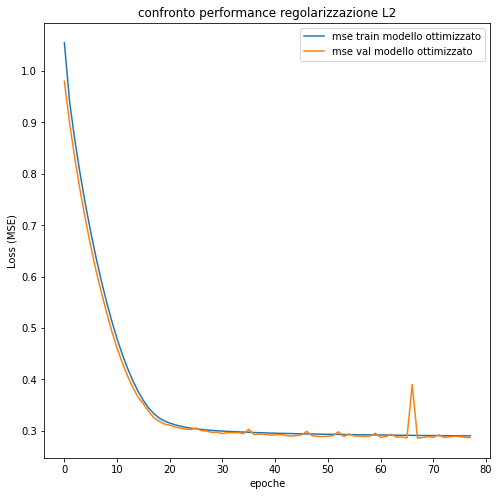

In [ ]:
plt.figure(figsize=(8, 8))
#plt.plot(train_no_opt_mse, "-*", label = "mse train modello no ottimizzato")
#plt.plot(val_no_opt_mse, "-*", label = "mse val modello no ottimizzato")
plt.plot(train_opt_loss, label = "mse train modello ottimizzato")
plt.plot(val_opt_loss, label = "mse val modello ottimizzato")
plt.legend()
plt.ylabel("Loss (MSE)")
plt.xlabel("epoche")
plt.title("confronto performance regolarizzazione L2")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/perf_opt_l2.csv")

In [ ]:
df.head()

,epochs,loss,val_loss,rmse,val_rmse
0,0,0.330649,0.305074,0.546865,0.526218
1,1,0.298228,0.291470,0.521607,0.516718
2,2,0.286968,0.281187,0.513630,0.509158
3,3,0.280584,0.278424,0.509577,0.508405
4,4,0.275751,0.270665,0.506557,0.502200


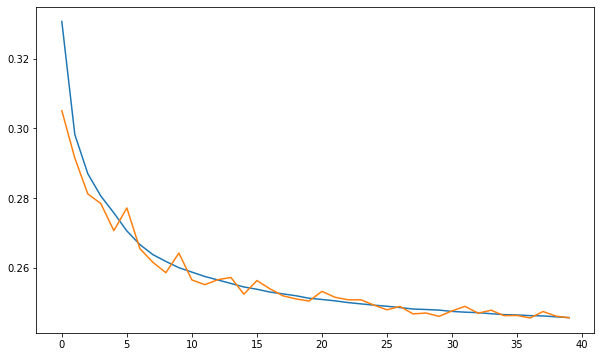

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['loss'])
plt.plot(df['val_loss'])